In [2]:
!pip install simpleaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.2 MB/s 
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp37-cp37m-linux_x86_64.whl size=2065925 sha256=1f6663c9df8266284dce2b038ba6e596a1c95dd188fecec5947b9f4b85c0186f
  Stored in directory: /root/.cache/pip/wheels/9a/d6/39/e26b6f988cc5acd1fba2c1b18f0debe27bdee3e1e53f4c93f9
Successfully built simpleaudio


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sfft
import matplotlib.mlab as mlab
import scipy.signal as ss
import cis
import IPython
%matplotlib inline

#3-1 (高速)フーリエ変換<br>

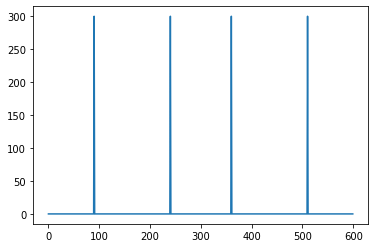

In [4]:
#3-1
#fft(高速フーリエ変換)
#fs:サンプリング周波数
#t:サンプリング周期
#y:信号
#cs:信号yに対する600点の離散フーリエ変換をFFTで計算
#abs():絶対値を返す関数
fs=100
t=np.arange(0,7,1/fs)
y=np.sin(2*np.pi*15*t)+np.cos(2*np.pi*40*t)
cs=sfft.fft(y[:600])
plt.plot(np.abs(cs))
plt.show()

高速フーリエ変換の結果, スペクトルが得られる.<br>
このグラフは絶対値を取ったもので, 振幅スペクトルと呼ぶ.<br>
スペクトルは周波数成分の大きさを表す.<br>

In [5]:
#配列の次元を求める
cs.shape

(600,)

In [6]:
#中心の値を確認する
np.abs(cs[297:304])

array([1.92195979e-13, 9.52716064e-14, 3.05045609e-13, 1.34614542e-13,
       3.05045609e-13, 9.52716064e-14, 1.92195979e-13])

このように, abs(cs)は, 600個のデータからなるベクトルであり, <br>
最初の図を見てもわかるよに, 300番(1.29e-13)を中心に線対称であることがわかる.

ところで, 1章で伊藤君がコンピューターの中で音は離散的に表されることを述べた.<br>
連続的なデータを離散的に表すには, データの成分はサンプリング周波数の1/2未満でなければいけない
(サンプリング定理より, アナログ信号をデジタル信号に正確に変換するには、元の信号の最大周波数の2倍以上のサンプリング周波数でサンプリングすればよい.<br>
これは, デジタル化された信号からはサンプリング周波数の半分の周波数までの信号しか正確に復元できない, と表現することもできるため).<br>
この上限の周波数（サンプリング周波数の半分）のことを「ナイキスト周波数」（Nyquist frequency）という. <br>
プログラム3-1では, サンプリング周波数が100Hzなので, ナイキスト周波数は50Hzとなる.

値を出力するのではなく, 条件を満たすインデクスの番号を調べるときは, nonzeroというメソッドを利用する.↓

In [7]:
#nonzeroを使ってそれぞれの山の位置を求める
(np.abs(cs)>250).nonzero()

(array([ 90, 240, 360, 510]),)

離散フーリエ変換の結果は, 実は複素数である.<br>

In [9]:
#-7.97*10^-12 -300j, つまり300jであることを示している.
cs[90]

(-8.01492205937393e-12-300.0000000000002j)

In [8]:
#cs[240]が300であることを示している.
cs[240]

(300.0000000000008-6.565414878423326e-12j)

位相角を求める関数がangle.

In [10]:
np.angle(cs[np.array([90,240])])

array([-1.57079633e+00, -2.18847163e-14])

In [11]:
np.angle(cs[np.array([90,240])])/np.pi

array([-5.00000000e-01, -6.96612154e-15])

上記の2つの結果より, cs[90]の位相は-1.5708=(-π/2)<br>
cs[240]の位相は0であることがわかる.<br>

#3-2 窓関数<br>

窓関数の例として, ハン窓を見てみる.<br>
プロットからわかるように, 中央1で, 裾に向かって緩やかに0になるように変化する.<br>

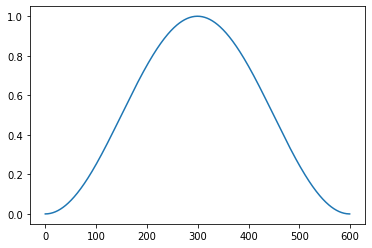

In [12]:
#ハン窓
w=np.hanning(600) #hanning=ハン窓を生成する関数
plt.plot(w)
plt.show()

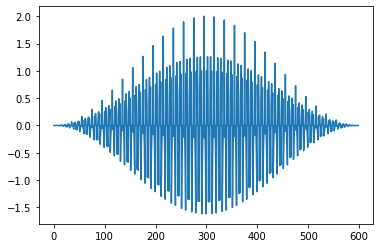

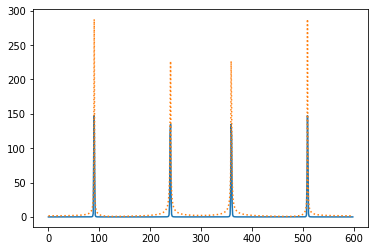

In [13]:
#3-2のプログラム(ハン窓の効果)
hy=y[:599]*np.hanning(599) #ハン窓をかけたもの
plt.plot(hy)
plt.show()
hcs=sfft.fft(hy) #hyをFFT
plt.plot(np.abs(hcs))
Ics=sfft.fft(y[:599]) #ハン窓かけていない元の信号をFFT
plt.plot(np.abs(Ics), ':')
plt.show()

窓をかけていない方が点線, 窓関数をかけている方が実線.<br>


(0.0, 40.0)

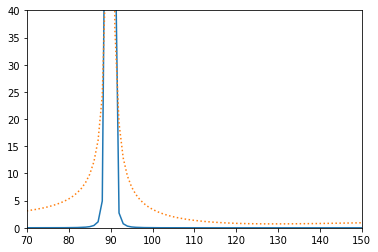

In [14]:
#拡大図1
hcs=sfft.fft(hy)
plt.plot(np.abs(hcs))
Ics=sfft.fft(y[:599])
plt.plot(np.abs(Ics), ':')
plt.xlim(70,150)
plt.ylim(0,40)

このグラフから見てわかるように, 点線より実線の方が,<br>
スペクトルの広がりがない.<br>
つまり, リークというのは, スペクトルの広がりを表すので, <br>
窓関数をかけることによって, リークが軽減されることがわかる.<br>

(130.0, 170.0)

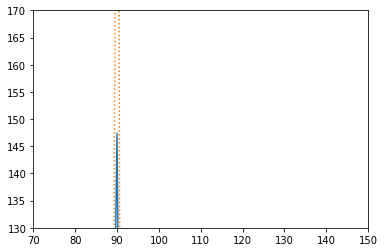

In [15]:
#拡大図2
hcs=sfft.fft(hy)
plt.plot(np.abs(hcs))
Ics=sfft.fft(y[:599])
plt.plot(np.abs(Ics), ':')
plt.xlim(70,150)
plt.ylim(130,170)

また, 山の部分の先端を拡大してみると, 窓をかけていない点線の方が高いことがわかる.<br>
つまり, 窓関数をかけると, リークの軽減される代わりに, ピークの頂点が低くなることがわかる.

#3-3 音声のフレーム処理<br>

In [16]:
y, fs=cis.wavread('domiso.wav') #ドミソの和音→C Major

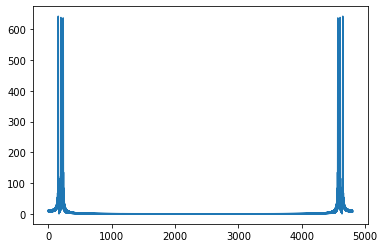

In [17]:
plt.plot(np.abs(sfft.fft(y)))
plt.show()

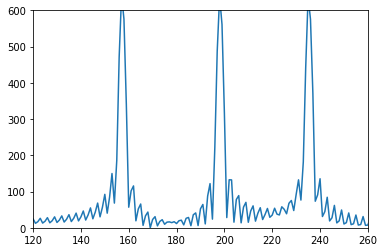

In [18]:
plt.plot(np.abs(sfft.fft(y)))
plt.xlim(120,260)
plt.ylim(0,600) #教科書では500だが, 上がみえないため拡張
plt.show()

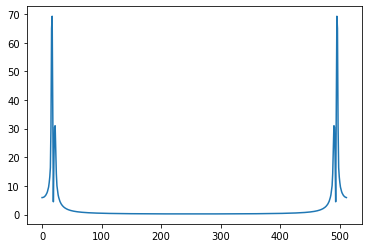

In [19]:
#ドミソの和音から, ミだけを抽出しようと試みる.
plt.plot(np.abs(sfft.fft(y[1300:1812]*np.hanning(512))))
plt.show()

この範囲では, ドも含まれているので, 2つの成分が観察できる.<br>

また, 実際の音声データ, 例えば, 「おんせい」という単語の発声データでは, <br>
「お」「ん」「せ」「い」というそれぞれの音は, 長さは違うし, どこからどこま
でがどの音なのかも実ははっきりしない.<br>
このような対象に対しては, 少しずつずらしながら分析することが一般的である.<br>
長いデータを少しずつの区分に分割して処理するとき, この区分のことをフ
レーム (frame) などと呼ぶ.

Pythonには, 1次元データのデータを固定長(同じ長さ)のフレームに分割し, 窓関数をかけて, <br>
fft処理してスペクトルをまとめて処理する関数が用意されている.<br>
→specgram

In [20]:
#3-3
#window: フレームにかける窓関数
#noverlap: ずらすときに重なるデータ点数
#mode: 複素数の係数を求めることを指定している
#Fs: サンプリング周波数
#NFFT: FFTの長さ
#S: サンプル点
#F: Frequency
#T: time

S, F, T=mlab.specgram(y,Fs=fs,NFFT=256,window=np.hanning(256),
noverlap=128,mode='complex' ,sides='twosided')

In [21]:
#プログラム3-3のSは２５６行３６列の行列となることを表している.
S.shape

(256, 36)

フレーム処理をして, 求めたスペクトルをまとめて可視化する関数も用意されている.<br>
名称は上で使った, specgramだが, プログラム3-3とは別のパッケージmatplotlib.pyplotのものである.↓

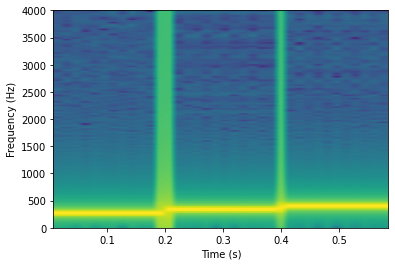

In [22]:
#スペクトログラム
_,_,_,_=plt.specgram(y,Fs=fs,NFFT=256,window=np.hanning(256), noverlap=128)
plt.xlabel ('Time (s)')
plt.ylabel ('Frequency (Hz)')
plt.show()

明るい部分が強い周波数成分を表す.<br>
このような可視化の方法及び図をスペクトログラムと呼ぶ.

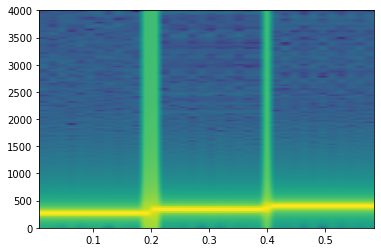

In [23]:
#同じデータに対し, ずらし幅はそのままで, FFTを増やす.
plt.figure(1); P,F,T,im=plt.specgram(y,Fs=fs,NFFT=256,window=np.hanning(256),noverlap=128)

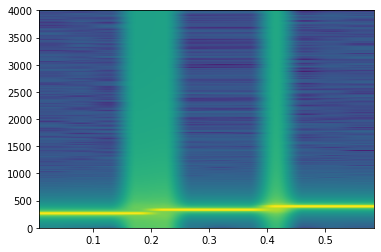

In [24]:
#同じデータに対し, ずらし幅はそのままで, FFTを増やす.
plt.figure(2); P,F,T,im=plt.specgram(y,Fs=fs,NFFT=512,window=np.hanning(512),noverlap=128)

Figure(2)の方が, 音の接続部分の滲みの幅が広く, 周波数成分の幅は細いことがわかる.<br>
つまり, FFTの長さが長いと, 周波数解像度は高くなるが, 時間解像度は低くなる.<br>

#3-4 逆(高速)フーリエ変換<br>

逆(高速)フーリエ変換は, Pythonでは, ifftという関数が用意されている.

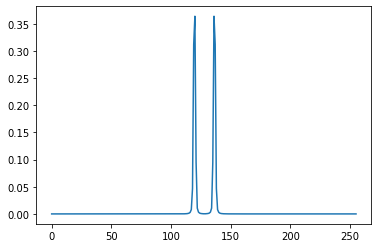

In [25]:
#逆(高速)フーリエ変換
S09=S[:,9]
plt.plot(np.abs(S09))
plt.show()

1行目でifftを利用して, 復元している.<br>



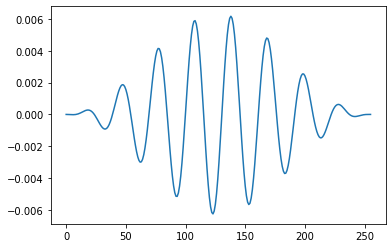

In [26]:
#1行目でifftを利用して, 復元している
plt.plot(np.real(sfft.ifft(sfft.fftshift(S09))))
plt.show()

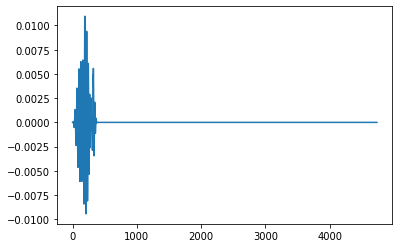

In [35]:
#3-4
y, fs=cis.wavread('domiso.wav')
fftlen=256
noverlap=128
S,_,_=mlab.specgram(y,Fs=fs,NFFT=fftlen,window=np.hanning(fftlen),noverlap=noverlap,mode='complex',sides='twosided')
slen=S.shape[1]
S=sfft.fftshift(S,axes=0)
ry=np.zeros(slen*fftlen-(slen-1)*noverlap)
k1=0
for k in range(0,slen):
    ry[k1:k1+fftlen]=ry[k1:k1+fftlen]+np.real(sfft.ifft(S[:,k]))
    k1=noverlap

plt.plot(ry)
plt.show()

In [30]:
IPython.display.Audio(ry, rate=fs, autoplay=True)

In [32]:
IPython.display.Audio(y, rate=fs, autoplay=True)